In [76]:
from learn_process import init_data, train_model
from visualization.visualize_data import plot_sample
from networks.unet_leiterrl import weights_init, TurbNetG, UNet
from networks.dummy_network import DummyNet
from tqdm.auto import tqdm
from torch.utils.tensorboard import SummaryWriter
from torch.nn import MSELoss
import torch.nn.functional as F
from solver import Solver

# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initialization Data

In [104]:
 # init data
datasets_2D, dataloaders_2D = init_data(dataset_name="perm_pressure1D_10dp", #"OLD_bash_file_and_script_structure/groundtruth_hps_no_hps/groundtruth_hps_overfit_10", 
        reduce_to_2D=True, reduce_to_2D_xy=True,
        inputs="xyztk", labels="t") #, batch_size=3)

init done [total number of datapoints/runs: 10], with train: 7, val: 2, test: 1


# Training

In [105]:
# parameters of model and training
loss_fn = MSELoss()
# n_epochs = 1000 #60000
learning_rate=0.0004 #0.0004

#model = TurbNetG(channelExponent=4, in_channels=4, out_channels=2)
unet_model = UNet(in_channels=6, out_channels=1).float()
# TODO too many in channels for unet?
fc_model = DummyNet().float()
# model.to(device)

name_folder="try_unstructured_grid" 
# name_folder="try_dummy_overfit10_try_reduce2d_xy"

In [106]:
# # train model
# _, writer = train_model(unet_model, dataloaders_2D, loss_fn, n_epochs, learning_rate, name_folder=name_folder)

solver = Solver(unet_model, dataloaders_2D["train"], dataloaders_2D["val"], 
                learning_rate=learning_rate, loss_func=loss_fn)
solver.train(n_epochs=1000, name_folder=name_folder)

epochs:   0%|          | 2/1000 [00:02<21:36,  1.30s/it, train loss: 0.9970, val loss: 0.9223]


KeyboardInterrupt: 

# Visualization

Resulting picture is at runs/plot_learned_test_sample.jpg
Mean:  0.4663582146167755 Max:  19.1066837310791 Min:  1.1771917343139648e-05


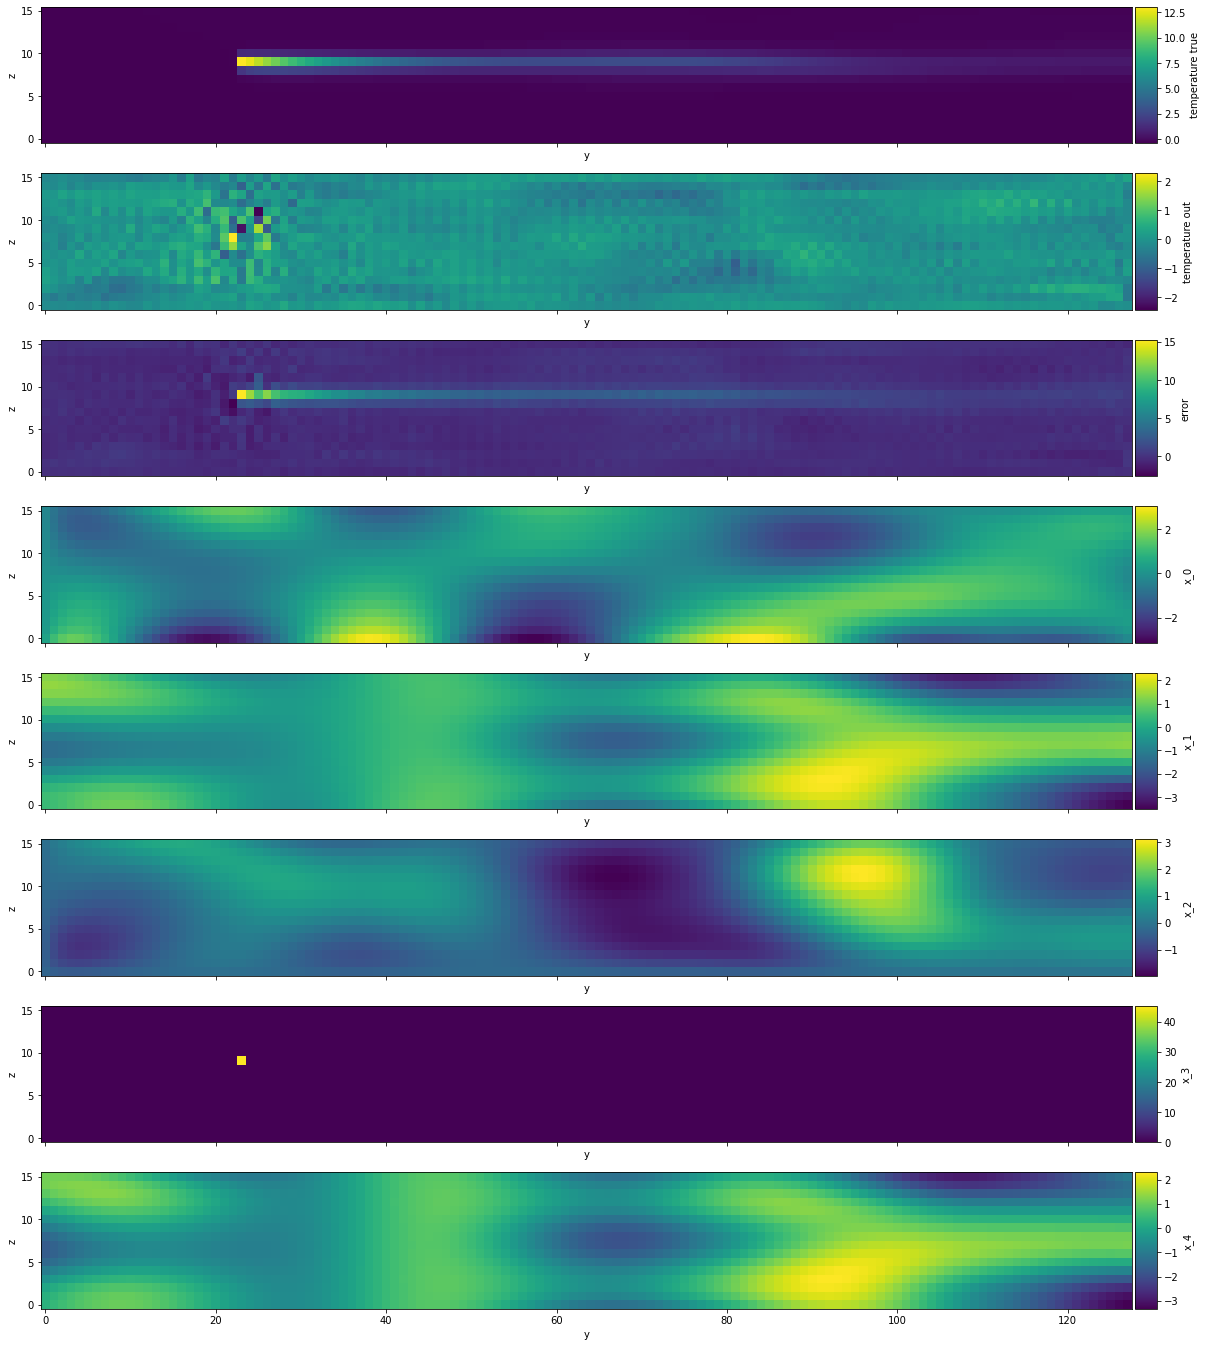

In [79]:
writer, error, error_mean = plot_sample(unet_model, dataloaders_2D["train"], name_folder, plot_name="plot_learned_test_sample")
print("Mean: ", error_mean, "Max: ", error.max().item(), "Min: ", error.min().item())
writer.close()

In [39]:
def run_w_current_settings(dataset_name:str="groundtruth_hps_no_hps/3datapoints_1D", destination_folder:str="unet_3datapoints_learn1_Fabians_values", n_epochs:int=1, reduce_to_2D:bool=True, reduce_to_2D_xy:bool=True):
    ## init data
    datasets_2D, dataloaders_2D = init_data(dataset_name=dataset_name, #"OLD_bash_file_and_script_structure/groundtruth_hps_no_hps/groundtruth_hps_overfit_10", 
            reduce_to_2D=reduce_to_2D, reduce_to_2D_xy=reduce_to_2D_xy,
            inputs="xyzt", labels="t") #, batch_size=3)

    ##settings (training)
    # parameters of model and training
    loss_fn = MSELoss()
    n_epochs = n_epochs #1000 #60000
    lr=0.0004 #0.0004

    #model = TurbNetG(channelExponent=4, in_channels=4, out_channels=2)
    unet_model = UNet(in_channels=5, out_channels=1).float()
    # TODO too many in channels for unet?
    fc_model = DummyNet().float()
    # model.to(device)

    # FALSCHER DATENSATZ (inkludiert extr_pump -> TODO do again)
    # name_folder="try_dummy_overfit10_try_reduce2d_xy"

    ## train model
    _, writer = train_model(unet_model, dataloaders_2D, loss_fn, n_epochs, lr, name_folder=name_folder)

    ## visualize
    writer, error, error_mean = plot_ample(unet_model, dataloaders_2D, name_folder, plot_name="plot_learned_test_sample")
    print("Mean: ", error_mean, "Max: ", error.max().item(), "Min: ", error.min().item())
    writer.close()

init done [total number of datapoints/runs: 3]


epochs: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s, loss: 0.9995]


Finished Training
Resulting picture is at runs/plot_learned_test_sample.jpg
Mean:  0.4819626212120056 Max:  11.104857444763184 Min:  0.004218503832817078


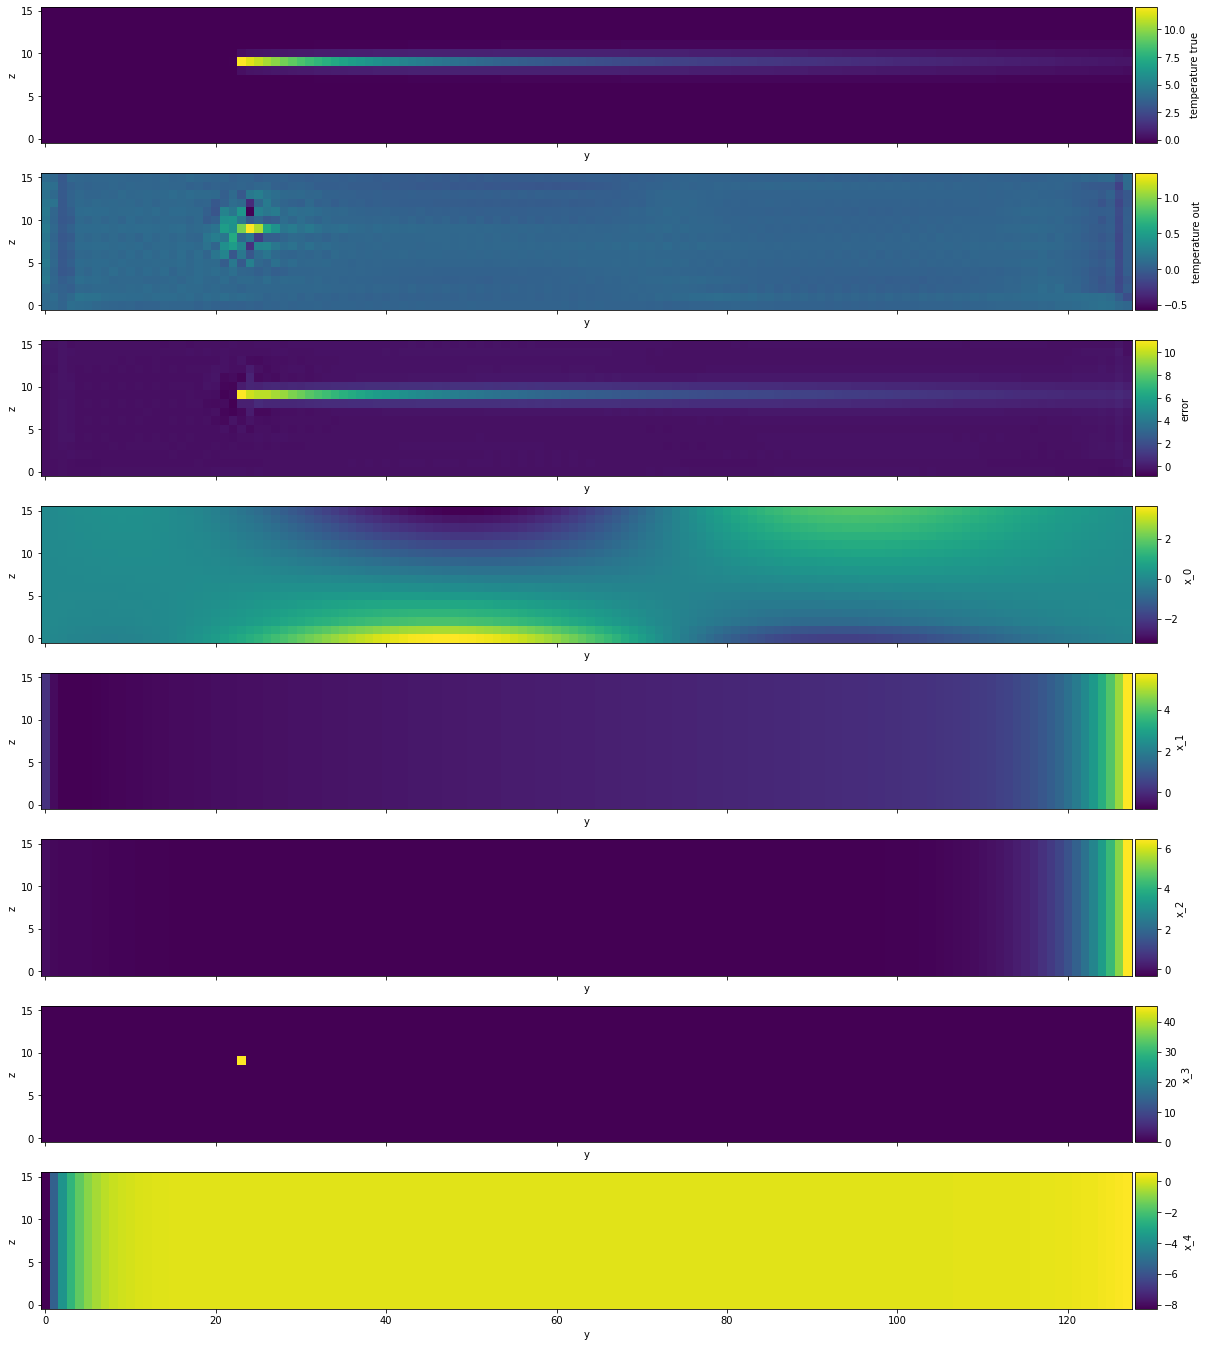

In [40]:
# run_w_current_settings(dataset_name="groundtruth_hps_no_hps/3datapoints_1D", destination_folder="unet_3datapoints_learn1_Fabians_values", n_epochs=30)
run_w_current_settings() #dataset_name="groundtruth_hps_no_hps/2datapoints", destination_folder="unet_3datapoints_learn1_reasonable_values", n_epochs=100)

In [83]:
import numpy as np

datasets, dataloaders = init_data(dataset_name="groundtruth_hps_no_hps/3datapoints_1D", 
            reduce_to_2D=False, reduce_to_2D_xy=False,
            inputs="xyzt", labels="t") #, batch_size=3)
ids = datasets["train"][0].inputs["Material_ID"].value
# print(ids)
print(ids.min(), ids.max())
max_id = ids.max()
loc_hp = np.where(ids == max_id)
number_cells = [20, 150, 16]
int(9+1 + 23*number_cells[0] + 9*number_cells[0]*number_cells[1])

init done [total number of datapoints/runs: 3]
created datapoint at index 0
tensor(-0.0055, dtype=torch.float64) tensor(181.0138, dtype=torch.float64)


27470

In [49]:

# TODO NEXT FIND THE ID OF THE HEATPUMP AND COMPARE TO UNSTRUCTURED GRID